In [ ]:
from google.colab import drive

# Mount your Google Drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

!pip install split-folders

In [ ]:

import splitfolders
splitfolders.ratio(
    "/content/drive/MyDrive/H D D/gwbz3fsgp8-2",
   output="./dataset",
   seed=7,
   ratio=(0.8,0.1,0.1)
)

Copying files: 928 files [00:38, 23.88 files/s] 


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# Set the image dimensions (e.g., 224x224) matching VGG16 input size
img_width, img_height = 224, 224
num_classes = 4

# Define data paths
train_data_dir = '/content/dataset/train'
test_data_dir = '/content/dataset/test'
valid_data_dir = '/content/dataset/val'

# Define hyperparameters
batch_size = 32

epochs = 300  # You can adjust this

In [ ]:
# Create a VGG16 model with pre-trained weights (include_top=False if you want to add your own FC layers)
base_model = VGG16(weights=None, include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the layers of the VGG16 base model
for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:

# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data augmentation for the validation and test set
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 741 images belonging to 4 classes.
Found 91 images belonging to 4 classes.
Found 96 images belonging to 4 classes.


In [ ]:

# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size
)


Epoch 1/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.2808 - loss: 1.3809 - val_accuracy: 0.2344 - val_loss: 1.3799
Epoch 2/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.1562 - loss: 1.4213 - val_accuracy: 0.3438 - val_loss: 1.3639
Epoch 3/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.3100 - loss: 1.3739 - val_accuracy: 0.3281 - val_loss: 1.3702
Epoch 4/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.3125 - loss: 1.3623 - val_accuracy: 0.3125 - val_loss: 1.3753
Epoch 5/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.2999 - loss: 1.3796 - val_accuracy: 0.2500 - val_loss: 1.3759
Epoch 6/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.4062 - loss: 1.3432 - val_accuracy: 0.3125 - val_loss: 1.3607
Epoch 7/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.3113 - loss: 1.3758 - val_accuracy: 0.3438 - val_loss: 1.3597
Epoch 8/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.2188 - loss: 1.3835 - val_accuracy: 0.28

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test accuracy: {test_acc}')

# Save the trained model
model.save('/content/drive/MyDrive/H D D/gwbz3fsgp8-2.keras')

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 969ms/step - accuracy: 0.3346 - loss: 1.3715
Test accuracy: 0.3020833432674408


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories and parameters for test data
test_data_dir = '/content/dataset/test'
batch_size = 32
input_shape = (224, 224)  # Ensure it matches the input shape used during training

# Test data generator (only rescale)
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important: set shuffle to False for test data
)

# Load the saved model
model = load_model('/content/drive/MyDrive/H D D/gwbz3fsgp8-2.keras')  # Corrected file path

# Evaluate the model on the test set
evaluation = model.evaluate(test_generator, verbose=1)

# Extract metrics
test_loss = evaluation[0]
test_accuracy = evaluation[1]

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Found 96 images belonging to 4 classes.
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 758ms/step - accuracy: 0.1510 - loss: 1.4109
Test Loss: 1.3709
Test Accuracy: 30.21%


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 430ms/step


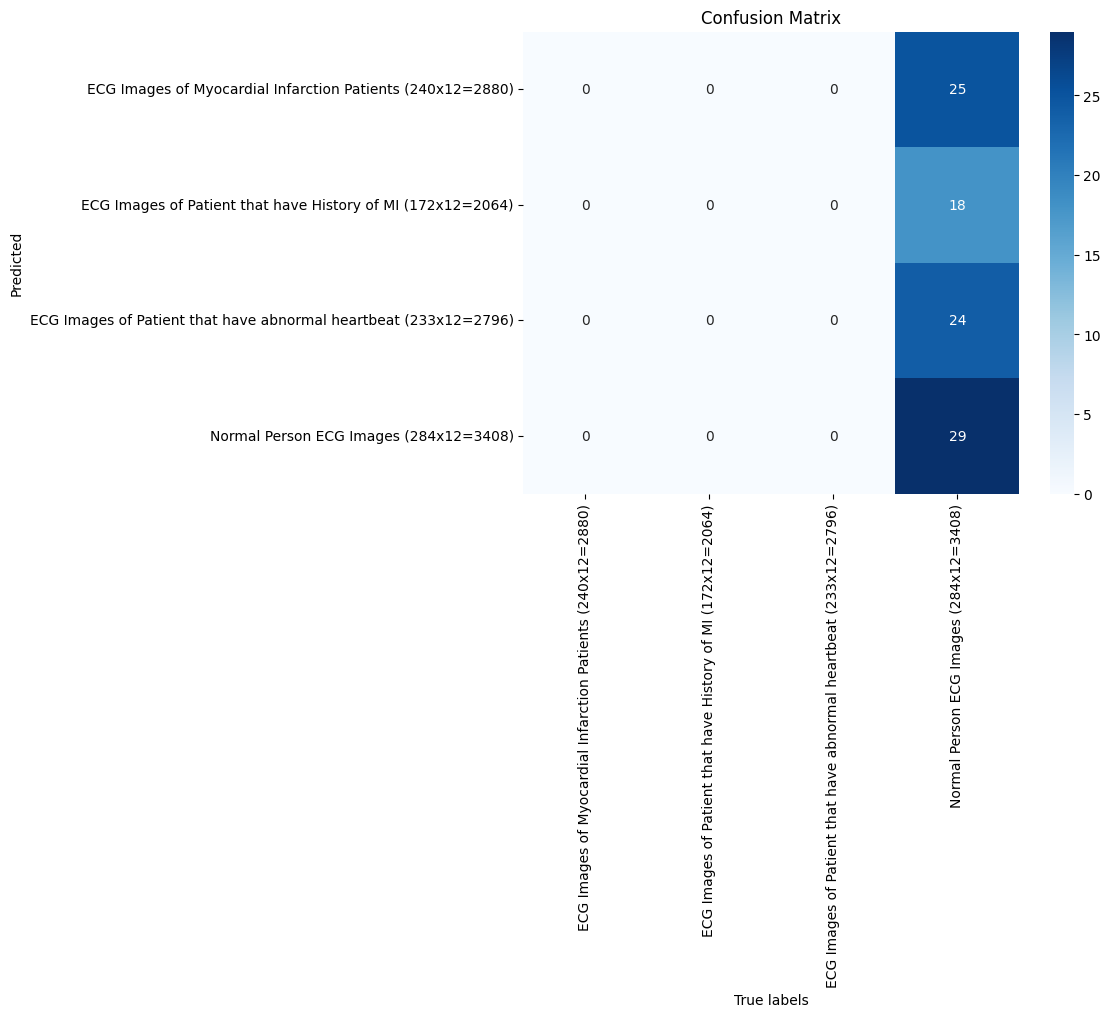

                                                                  precision    recall  f1-score   support

      ECG Images of Myocardial Infarction Patients (240x12=2880)       0.00      0.00      0.00        25
     ECG Images of Patient that have History of MI (172x12=2064)       0.00      0.00      0.00        18
ECG Images of Patient that have abnormal heartbeat (233x12=2796)       0.00      0.00      0.00        24
                          Normal Person ECG Images (284x12=3408)       0.30      1.00      0.46        29

                                                        accuracy                           0.30        96
                                                       macro avg       0.08      0.25      0.12        96
                                                    weighted avg       0.09      0.30      0.14        96



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# Assuming you have your test data generator and labels
test_generator.reset()  # Reset the generator before using it for predictions

# Generate predictions
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels
true_labels = test_generator.classes

# Generate confusion matrix
confusion_mtx = confusion_matrix(true_labels, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices,
            yticklabels=test_generator.class_indices)
plt.xlabel('True labels')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(true_labels, y_pred, target_names=test_generator.class_indices.keys()))


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 702ms/step


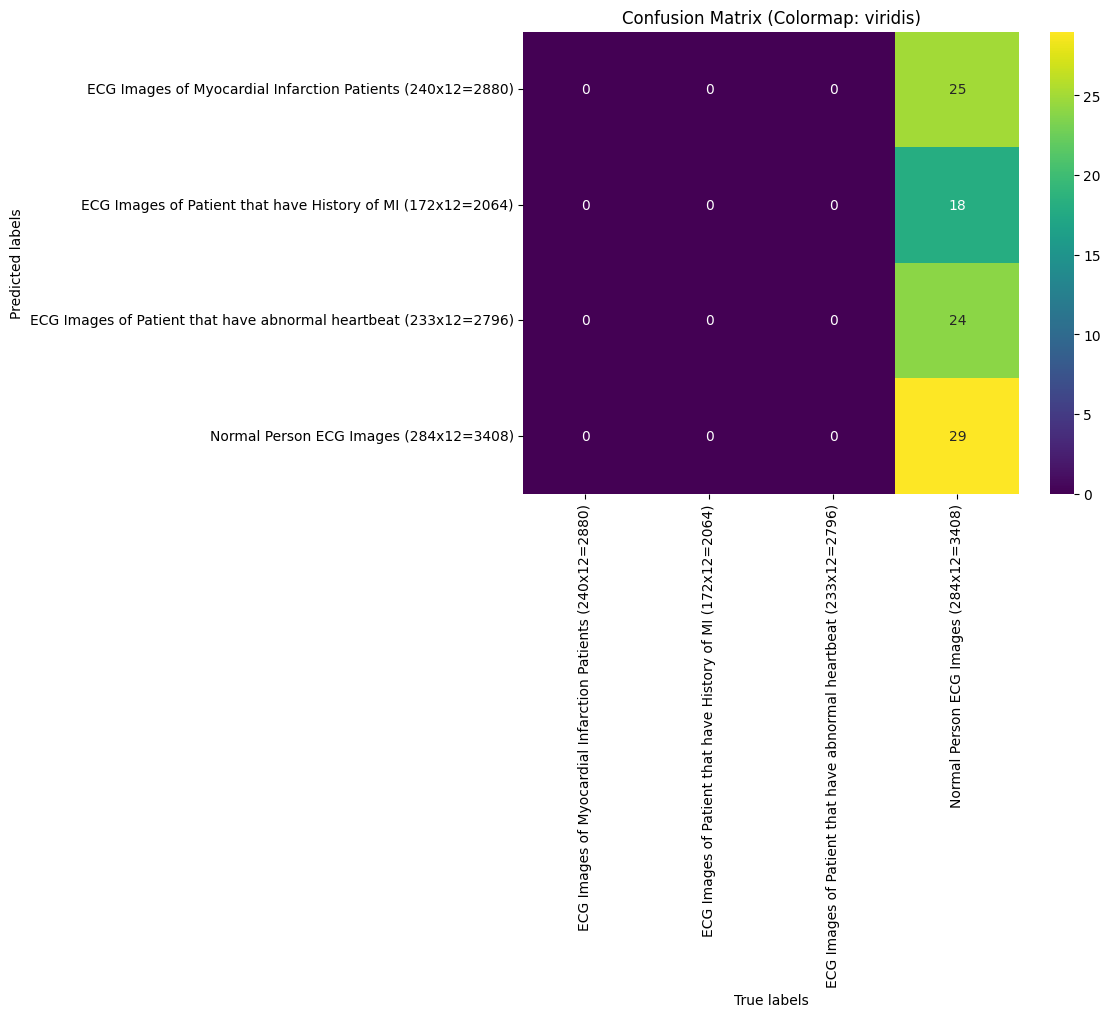

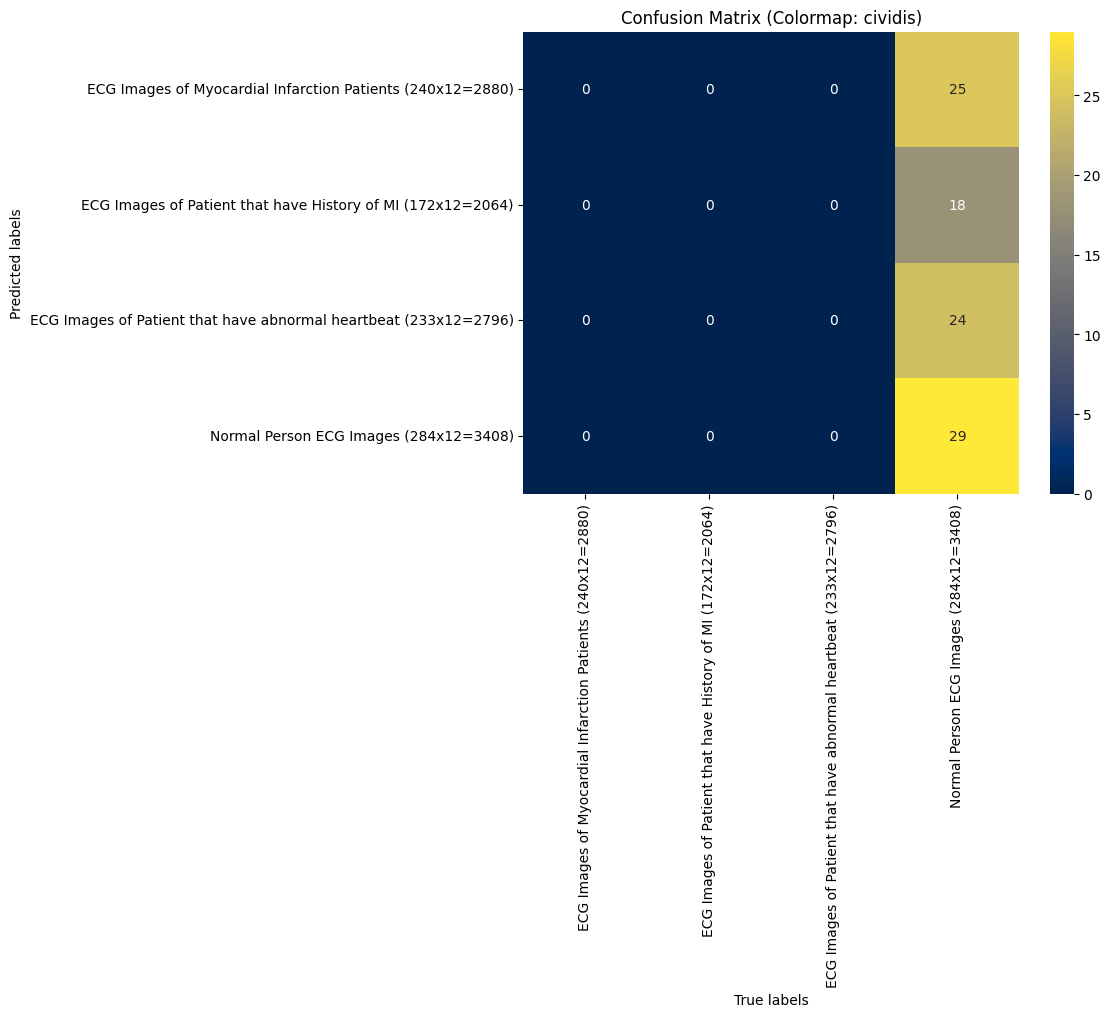

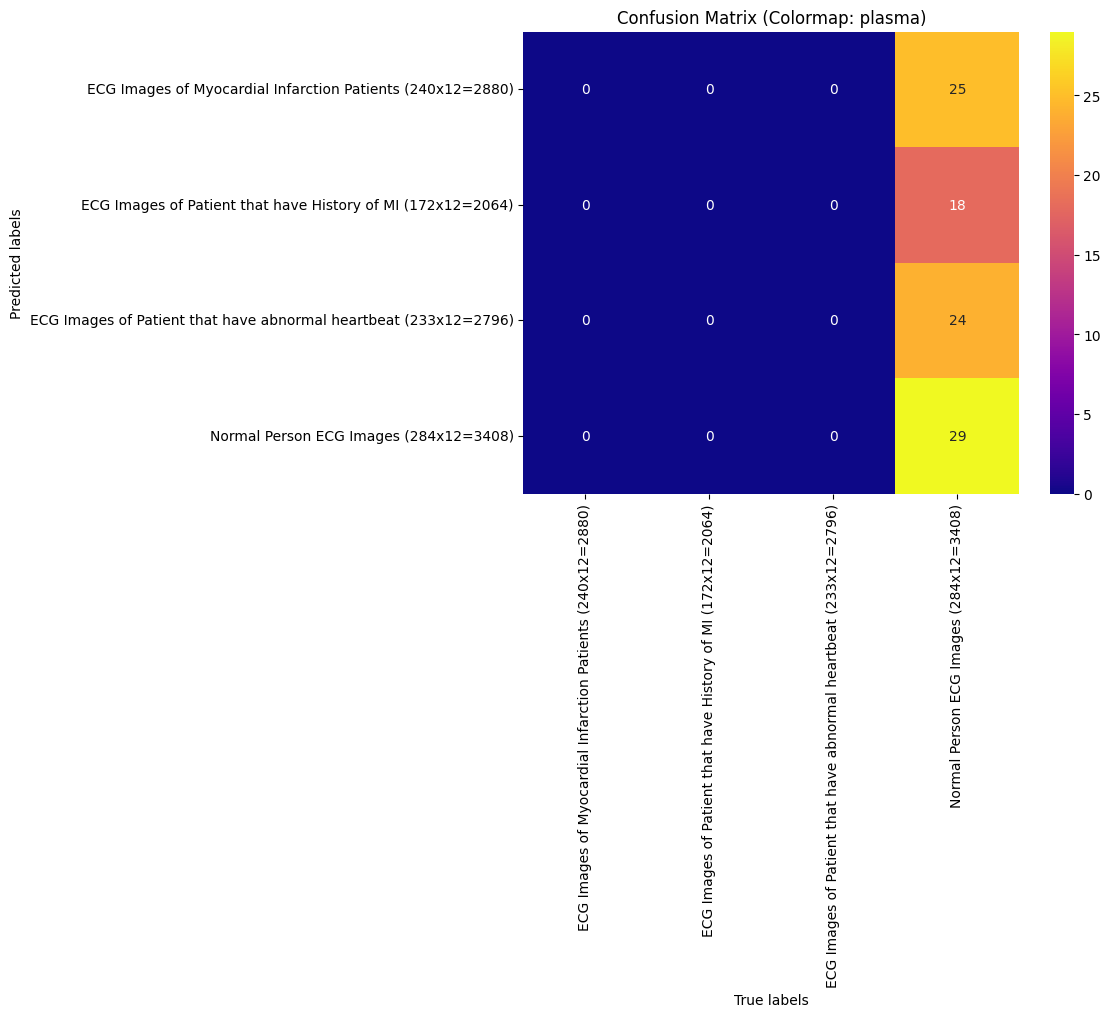

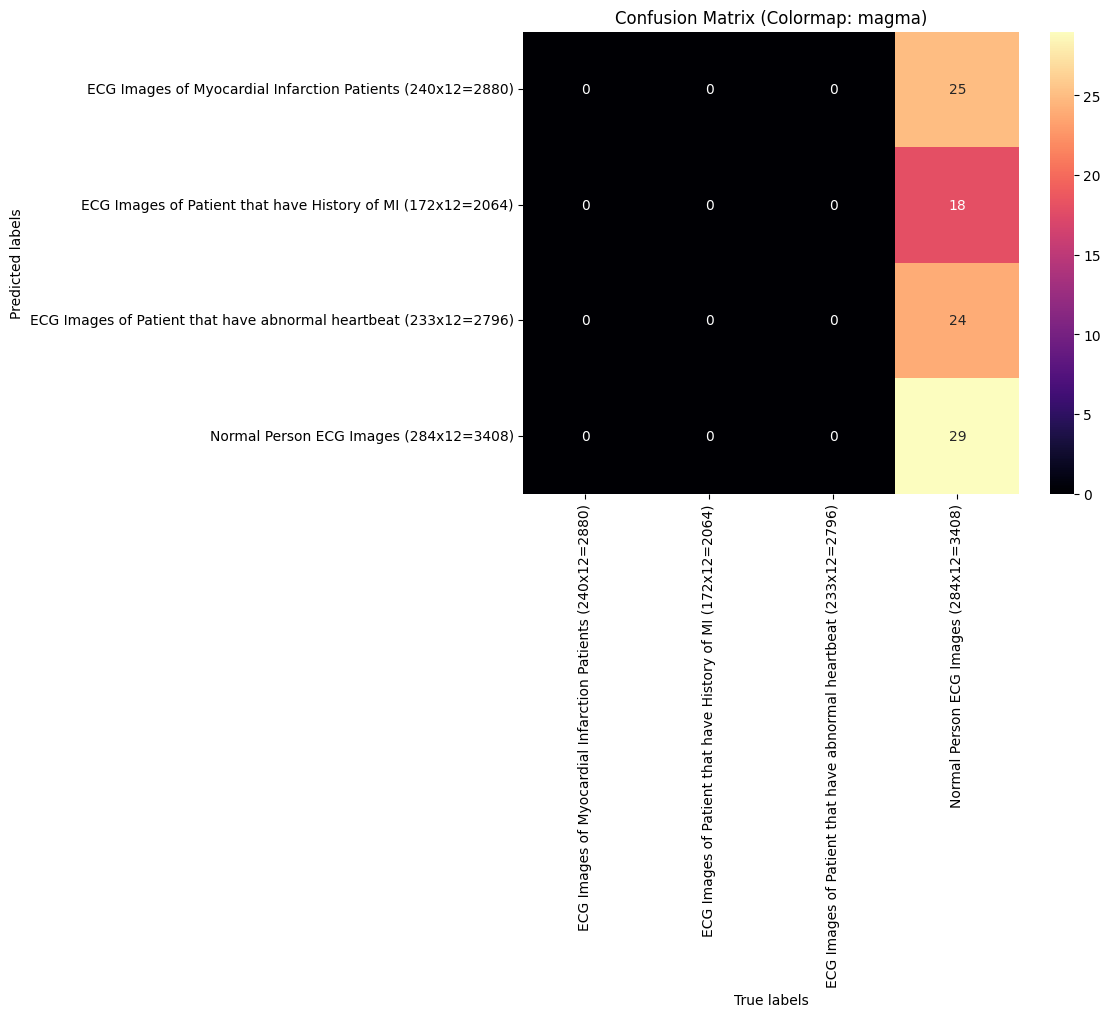

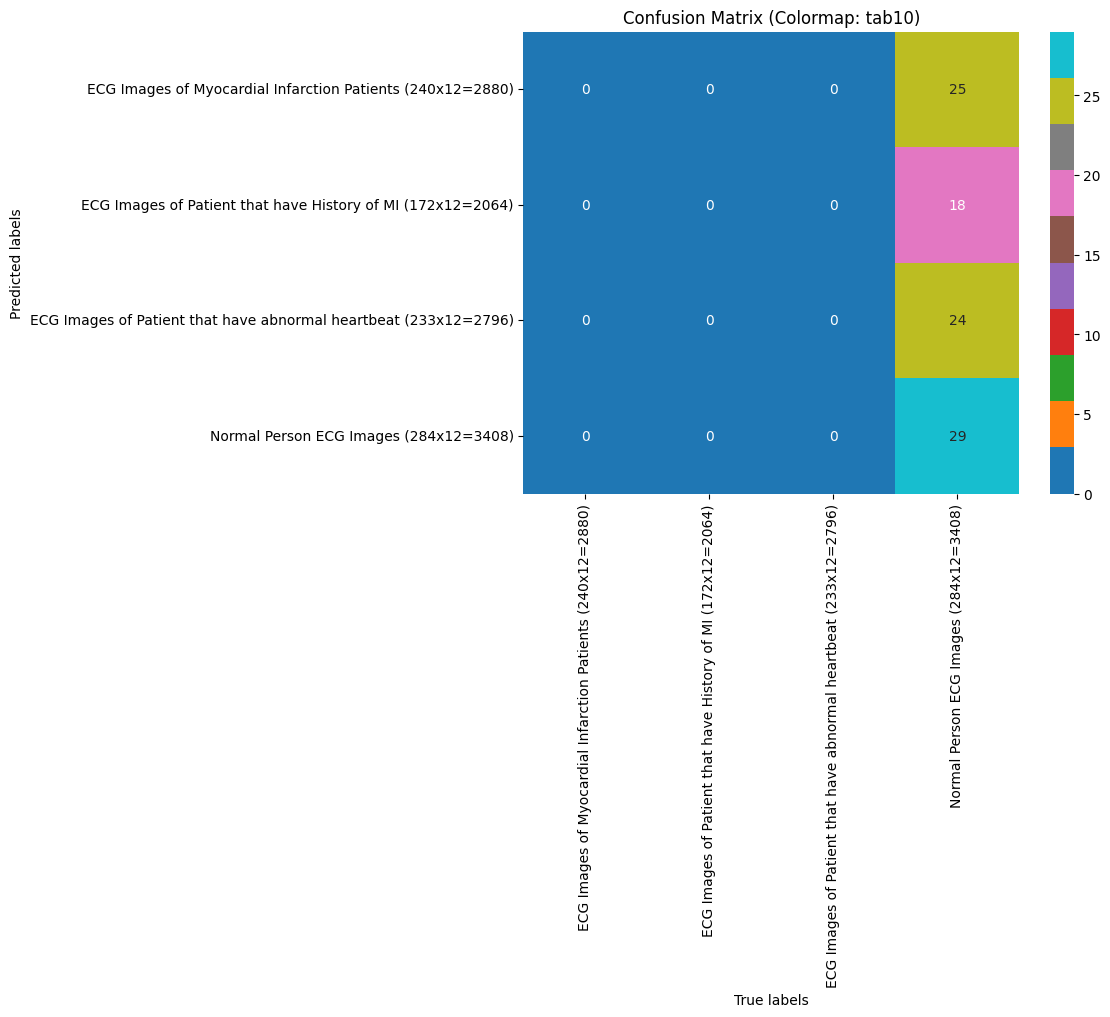

                                                                  precision    recall  f1-score   support

      ECG Images of Myocardial Infarction Patients (240x12=2880)       0.00      0.00      0.00        25
     ECG Images of Patient that have History of MI (172x12=2064)       0.00      0.00      0.00        18
ECG Images of Patient that have abnormal heartbeat (233x12=2796)       0.00      0.00      0.00        24
                          Normal Person ECG Images (284x12=3408)       0.30      1.00      0.46        29

                                                        accuracy                           0.30        96
                                                       macro avg       0.08      0.25      0.12        96
                                                    weighted avg       0.09      0.30      0.14        96



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have your test data generator and labels
test_generator.reset()  # Reset the generator before using it for predictions

# Generate predictions
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels
true_labels = test_generator.classes

# Generate confusion matrix
confusion_mtx = confusion_matrix(true_labels, y_pred)

# Generate confusion matrix with different colormaps
cmaps = ['viridis', 'cividis', 'plasma', 'magma', 'tab10']
for cmap in cmaps:
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap=cmap,
                xticklabels=test_generator.class_indices,
                yticklabels=test_generator.class_indices)
    plt.xlabel('True labels')
    plt.ylabel('Predicted labels')
    plt.title(f'Confusion Matrix (Colormap: {cmap})')
    plt.show()
# Classification report
print(classification_report(true_labels, y_pred, target_names=test_generator.class_indices.keys()))


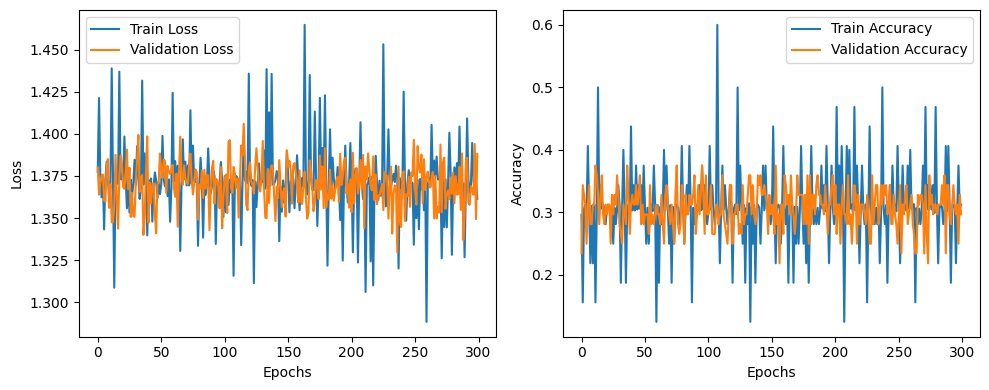

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss over epochs
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy over epochs
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


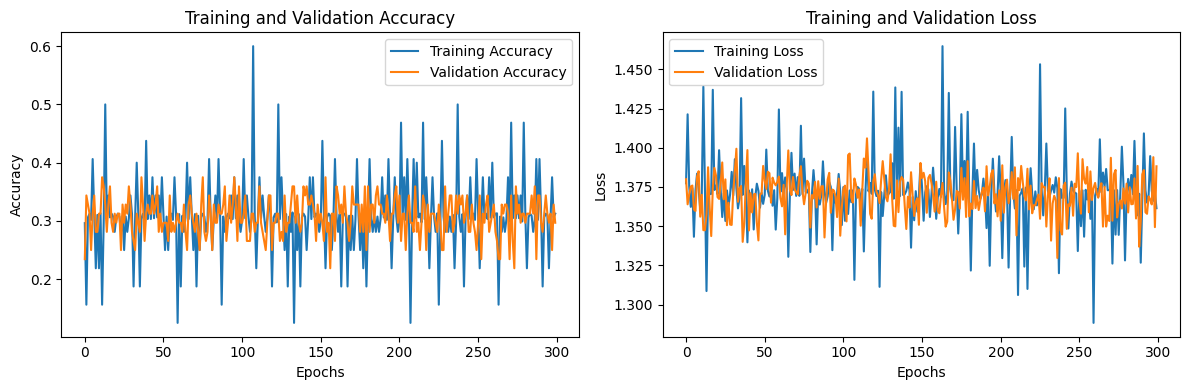

In [ ]:
import matplotlib.pyplot as plt

# Get training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


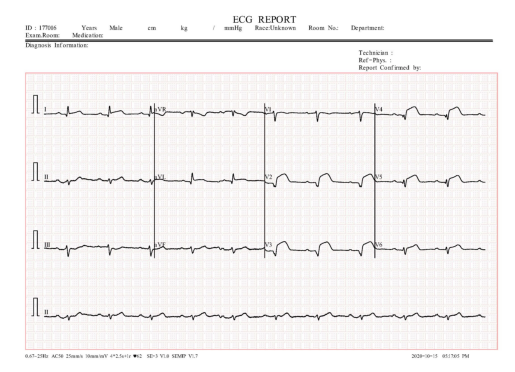

Predicted class: Normal


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/H D D/gwbz3fsgp8-2.keras')

# Load and preprocess the input image
image_path = '/content/drive/MyDrive/H D D/gwbz3fsgp8-2/ECG Images of Myocardial Infarction Patients (240x12=2880)/MI(100).jpg'  # Replace with the path to your input image
img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0  # Normalize the image

# Classify the input image
predictions = model.predict(img)

# Get the class label
class_label = np.argmax(predictions)
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

# Define your class labels
class_labels = ['myocardial','history of mi','abnormal heart beat', 'Normal']  # Replace with your class labels

predicted_class_label = class_labels[class_label]

print(f'Predicted class: {predicted_class_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 981ms/step


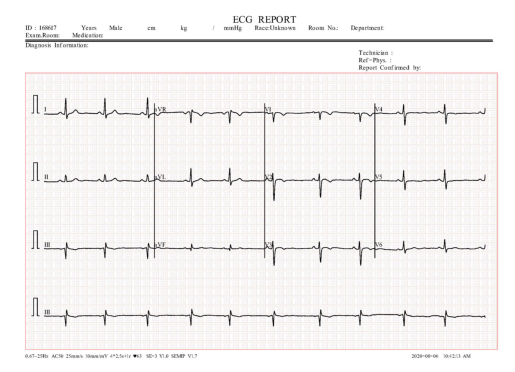

Predicted class: Normal


In [ ]:

from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/H D D/gwbz3fsgp8-2.keras')

# Load and preprocess the input image
image_path = '/content/drive/MyDrive/H D D/gwbz3fsgp8-2/ECG Images of Patient that have History of MI (172x12=2064)/PMI(100).jpg'  # Replace with the path to your input image
img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0  # Normalize the image

# Classify the input image
predictions = model.predict(img)

# Get the class label
class_label = np.argmax(predictions)
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

# Define your class labels
class_labels = ['myocardial','history of mi','abnormal heart beat', 'Normal']  # Replace with your class labels

predicted_class_label = class_labels[class_label]

print(f'Predicted class: {predicted_class_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step


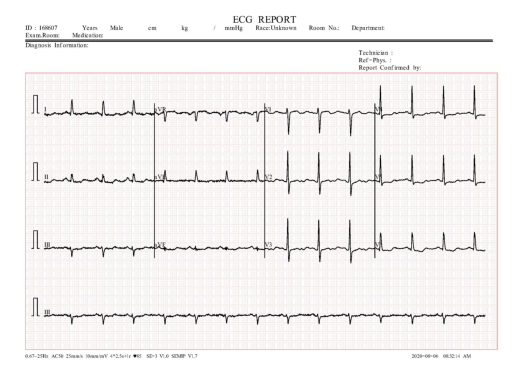

Predicted class: Normal


In [ ]:

from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/H D D/gwbz3fsgp8-2.keras')

# Load and preprocess the input image
image_path = '/content/drive/MyDrive/H D D/gwbz3fsgp8-2/ECG Images of Patient that have abnormal heartbeat (233x12=2796)/HB(10).jpg'  # Replace with the path to your input image
img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0  # Normalize the image

# Classify the input image
predictions = model.predict(img)

# Get the class label
class_label = np.argmax(predictions)
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

# Define your class labels
class_labels = ['myocardial','history of mi','abnormal heart beat', 'Normal']  # Replace with your class labels

predicted_class_label = class_labels[class_label]

print(f'Predicted class: {predicted_class_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step


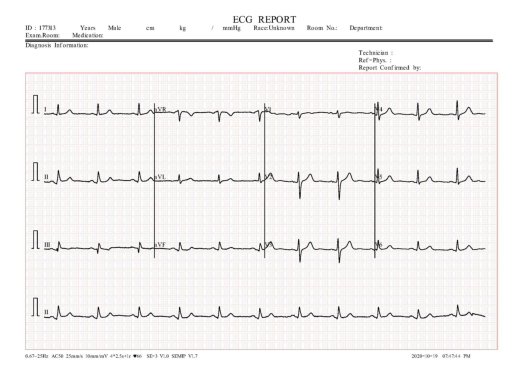

Predicted class: Normal


In [ ]:


from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/H D D/gwbz3fsgp8-2.keras')

# Load and preprocess the input image
image_path = '/content/drive/MyDrive/H D D/gwbz3fsgp8-2/Normal Person ECG Images (284x12=3408)/Normal(106).jpg'  # Replace with the path to your input image
img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0  # Normalize the image

# Classify the input image
predictions = model.predict(img)

# Get the class label
class_label = np.argmax(predictions)
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

# Define your class labels
class_labels =['myocardial','history of mi','abnormal heart beat', 'Normal'] # Replace with your class labels

predicted_class_label = class_labels[class_label]

print(f'Predicted class: {predicted_class_label}')


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Define the number of classes
num_classes = 4  # Change this to match the number of classes in your dataset

# Initialize variables to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/H D D/gwbz3fsgp8-2.keras')

# Load and preprocess the test data
test_data_dir = '/content/dataset/test'  # Replace with the path to your test data
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=1,  # Set batch_size to 1 for individual predictions
    class_mode='categorical',
    shuffle=False  # Don't shuffle the data
)

# Make predictions on the test data and record true and predicted labels
for i in range(test_generator.samples):
    x, y = test_generator[i]
    true_label = np.argmax(y)
    predicted_label = np.argmax(model.predict(x))
    true_labels.append(true_label)
    predicted_labels.append(predicted_label)

# Create the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(confusion)

# You can also print a classification report with precision, recall, and F1-score
target_names =['myocardial','history of mi','abnormal heart beat', 'Normal']  # Replace with your class labels
report = classification_report(true_labels, predicted_labels, target_names=target_names)
print("\nClassification Report:")
print(report)


Found 96 images belonging to 4 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Found 96 images belonging to 4 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step


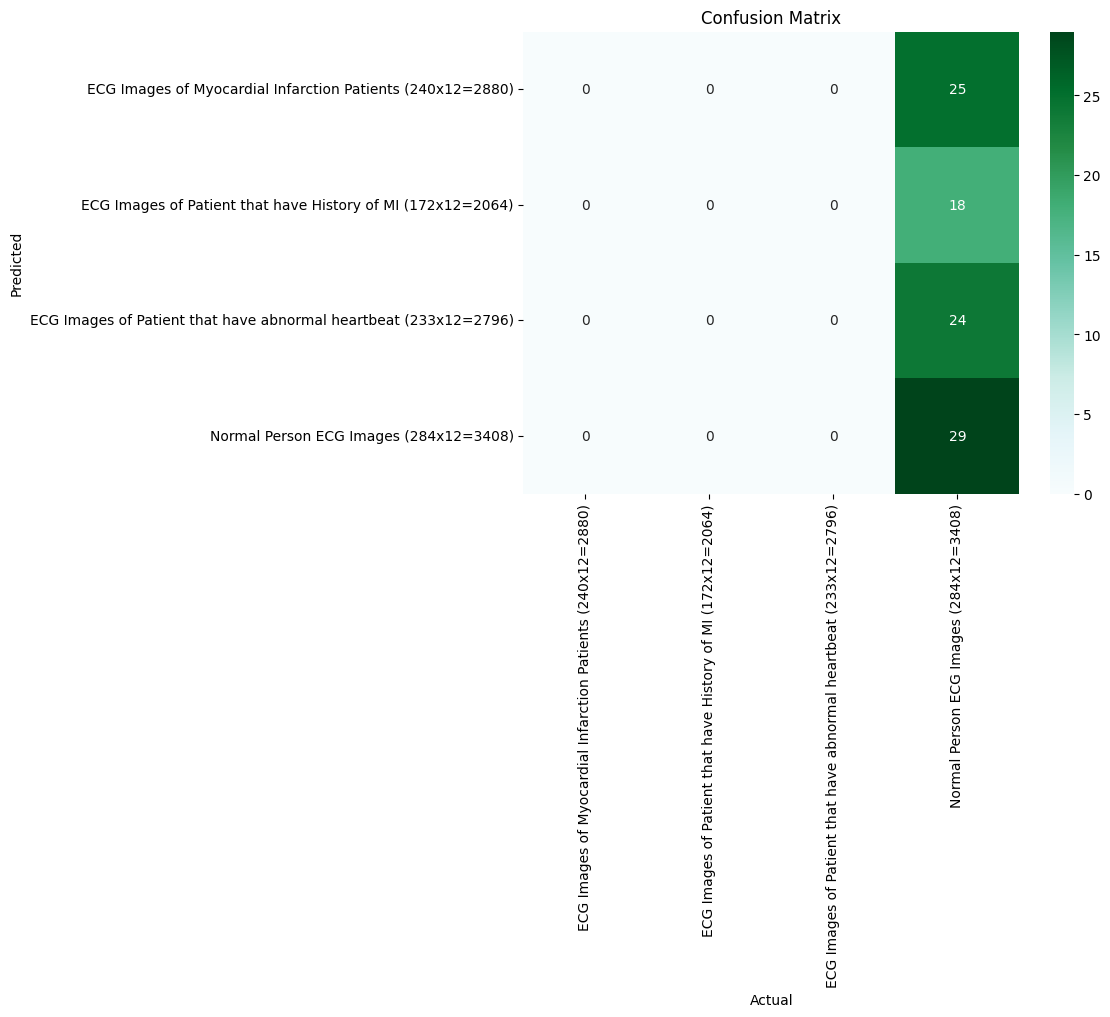

In [ ]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/content/drive/MyDrive/H D D/gwbz3fsgp8-2.keras')  # Load your saved model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1./255)  # You can add other preprocessing options here if needed

# Set up the test generator
test_generator = test_datagen.flow_from_directory(
    '/content/dataset/test',
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)


# Obtain predicted classes for the test set
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels
true_labels = test_generator.classes

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, y_pred)

# Get class names
class_names = list(test_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuGn', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


Found 96 images belonging to 4 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step


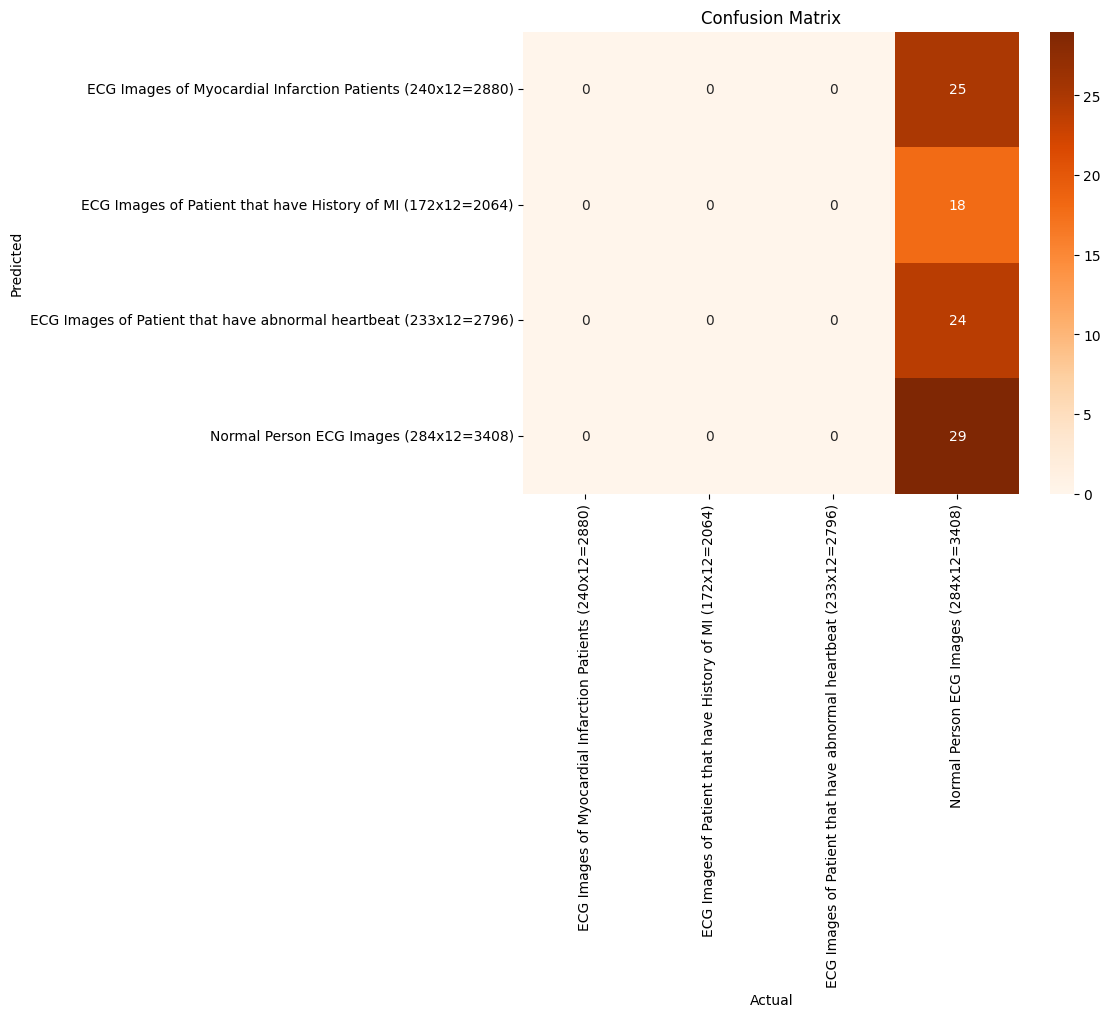

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/content/drive/MyDrive/H D D/gwbz3fsgp8-2.keras')  # Load your saved model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1./255)  # You can add other preprocessing options here if needed

# Set up the test generator
test_generator = test_datagen.flow_from_directory(
    '/content/dataset/test',
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)


# Obtain predicted classes for the test set
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels
true_labels = test_generator.classes

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, y_pred)

# Get class names
class_names = list(test_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()